## Step 1: Load the dataset and prepare it

In [11]:
# Load necessary libraries
library(ggplot2)
library(factoextra)

# Read the dataset (if not already loaded)
abalone <- read.csv("abalone_dataset.csv")

# Add the age.group column based on the number of rings
dataset <- abalone
dataset$age.group <- cut(dataset$rings, breaks = c(0, 8, 11, 35), labels = c("young", "adult", "old"))

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## Step 2: Select the best-performing feature subset from Exercise 1

In [12]:
# Assuming Model 1 was the better-performing model (replace with Model 2 if necessary)
best_features <- c("whole_weight", "shucked_wieght", "shell_weight")  

# Prepare the data for K-Means clustering
cluster_data <- dataset[, best_features]

## Step 3: Find the optimal value of K using the Elbow Method

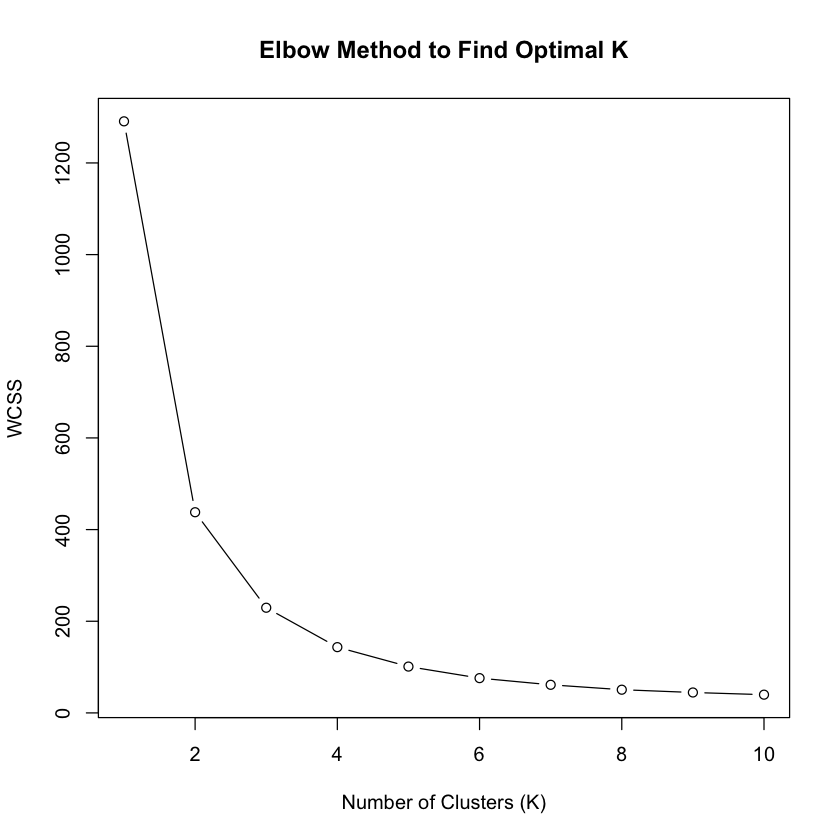

In [13]:
# Initialize a vector to store the total within-cluster sum of squares (WCSS)
wcss <- numeric(10)

# Calculate WCSS for K values from 1 to 10
for (i in 1:10) {
  kmeans_model <- kmeans(cluster_data, centers = i, nstart = 25)
  wcss[i] <- kmeans_model$tot.withinss
}

# Plot the Elbow Method graph
plot(1:10, wcss, type = "b", xlab = "Number of Clusters (K)", ylab = "WCSS", main = "Elbow Method to Find Optimal K")

In [18]:
# Calculate the difference in WCSS between consecutive K values
wcss_diff <- diff(wcss)

# Find the point where the difference starts to decrease significantly (elbow point)
optimal_k <- which.min(wcss_diff) + 1  # Add 1 because diff() reduces the length by 1

# Print the optimal K value
print(paste("Optimal K value:", optimal_k))

[1] "Optimal K value: 2"


## Step 4: Train the K-Means model with the optimal K

In [19]:
# Choose the optimal K based on the Elbow Method 
optimal_k <- 2  # Replace with the optimal K from the Elbow plot

# Train the K-Means model with the optimal K
set.seed(123)
kmeans_model <- kmeans(cluster_data, centers = optimal_k, nstart = 25)

# Add the cluster assignments to the dataset
dataset$cluster <- as.factor(kmeans_model$cluster)

In [20]:
## Step 5: Plot the assigned clusters for two of the features

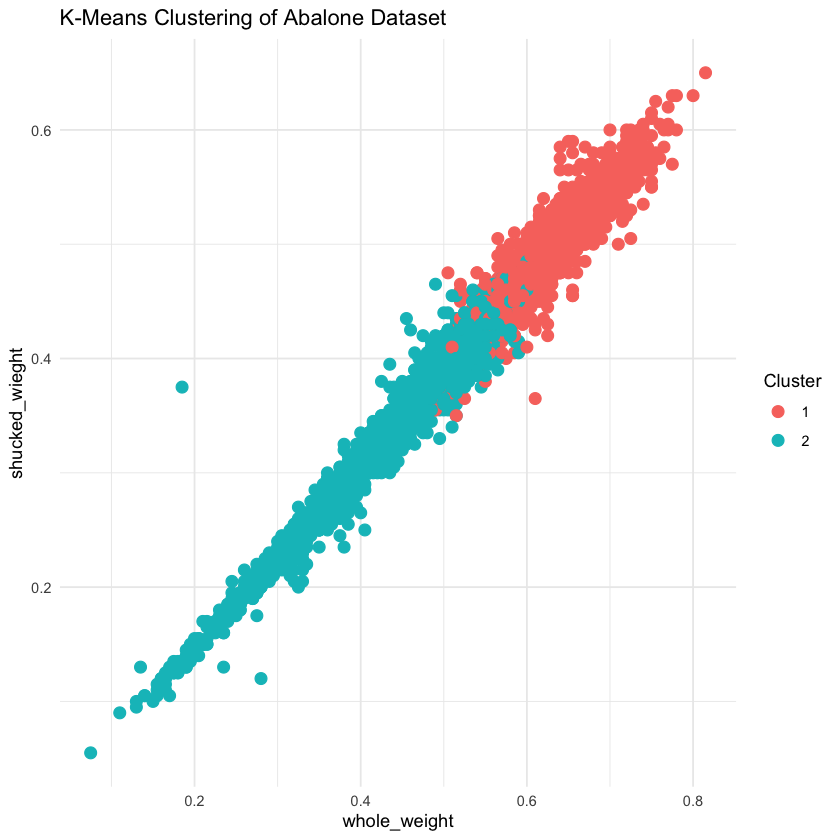

In [21]:
# Plot the clusters using two features (e.g., length and diameter)
ggplot(dataset, aes(x = length, y = diameter, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "K-Means Clustering of Abalone Dataset",
       x = "whole_weight",
       y = "shucked_wieght",
       color = "Cluster") +
  theme_minimal()

## Step 6: Visualize the clusters 

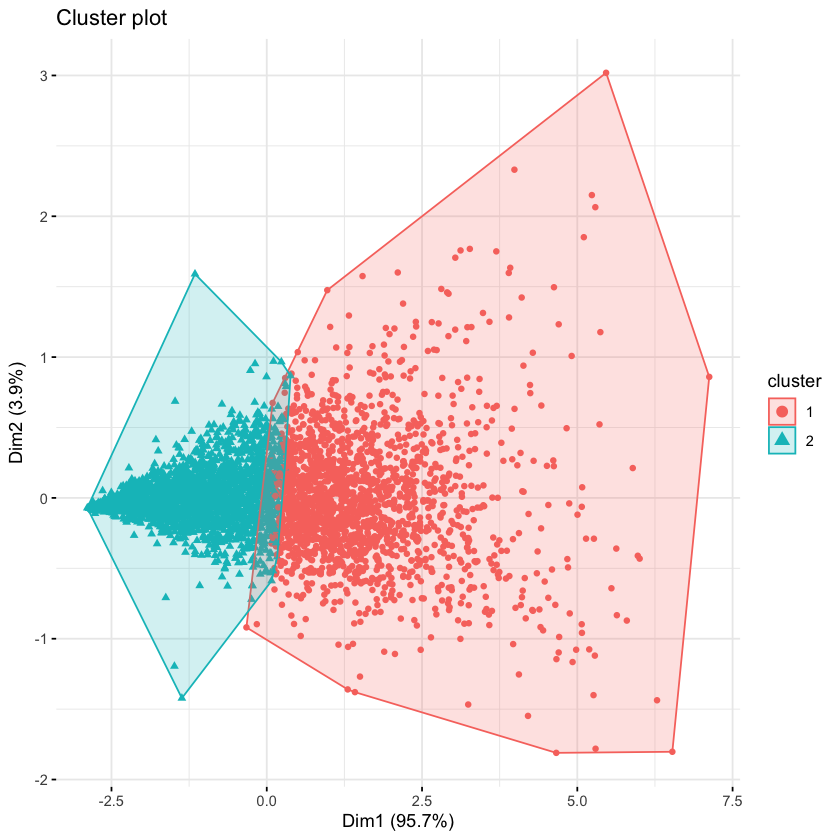

In [22]:
# Visualize the clusters using factoextra
fviz_cluster(kmeans_model, data = cluster_data, 
             geom = "point",
             ellipse.type = "convex",
             ggtheme = theme_minimal())